In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

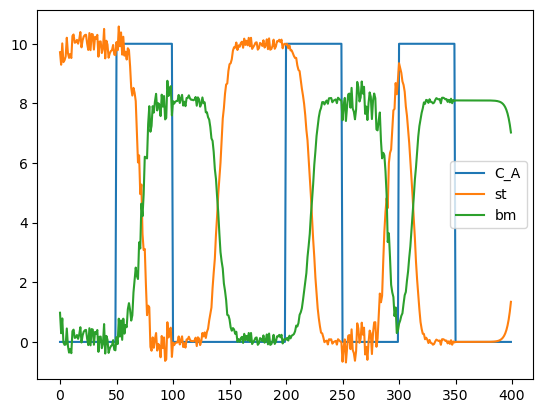

In [3]:
import numpy as np
import matplotlib.pyplot as plt

i1 = np.loadtxt("compoundARaw.txt")
i2 = np.loadtxt("substrateRaw.txt")
t1 = np.loadtxt("biomassRaw.txt")

testBorder = 1600

i1Data = i1[0:testBorder]
i1Gen = i1[testBorder:2000]
i2Data = i2[0:testBorder]
i2Gen = i2[testBorder:2000]
t1Data = t1[0:testBorder]
t1Gen = t1[testBorder:2000]

np.savetxt("compoundA.txt",i1Data)
np.savetxt("subtract.txt",i2Data)
np.savetxt("biomass.txt",t1Data)

np.savetxt("test_compoundA.txt",i1Gen)
np.savetxt("test_subtract.txt",i2Gen)
np.savetxt("test_biomass.txt",t1Gen)

plt.plot(i1Gen,label = "C_A")
plt.plot(i2Gen,label = "st")
plt.plot(t1Gen,label = "bm")
plt.legend()
plt.show()

In [4]:
tf.keras.utils.set_random_seed(313)
tf.config.experimental.enable_op_determinism()
i1 = np.loadtxt("compoundA.txt")
i2 = np.loadtxt("subtract.txt")
t1 = np.loadtxt("biomass.txt")

maxData = np.size(t1)
print(maxData)

1600


In [5]:
for i in range(0,maxData):
    if i2[i]<0:
        i2[i]=0
    if t1[i]<0:
        t1[i]=0

In [ ]:
# combine
input_features=np.vstack((i1,i2)).transpose()

trainData = 1200
valData = 400
inputTrain = input_features[0:trainData]
inputTest = input_features[trainData:maxData]
t1Train = t1[0:trainData]
t1Test = t1[trainData:maxData]

print(len(t1Test))


400


In [9]:
# Generate the nn model
nnet = Sequential()
# 作业：理解activation function
nnet.add(Dense(5,input_dim=2,activation='tanh'))

nnet.add(Dense(8,input_dim=2,activation='tanh'))
nnet.add(Dense(4, activation='tanh'))

nnet.add(Dense(1,activation='linear'))

/opt/anaconda3/envs/comp_9814/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
nnet.compile(loss= 'mean_squared_error', optimizer = Adam(learning_rate=0.01))
es=EarlyStopping(monitor='val_loss',mode='min',patience=10,restore_best_weights=True)
ynt=nnet.predict(inputTest)
nnet.summary()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


2025-09-30 15:43:25.939190: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-09-30 15:43:25.939532: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104 (416.00 B)

 Trainable params: 104 (416.00 B)

 Non-trainable params: 0 (0.00 B)

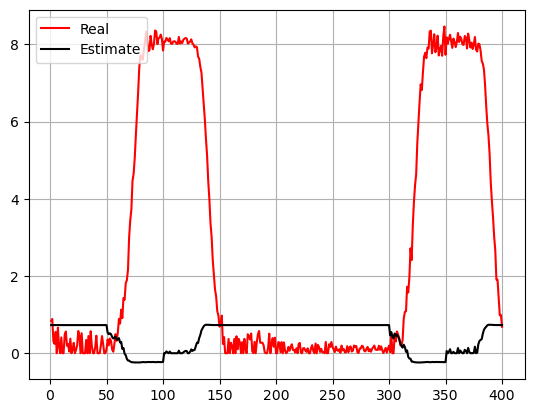

In [ ]:
x=np.arange(1,valData+1)
plt.figure(1)
plt.plot(x,t1Test,'r-',label='Real')
plt.plot(x,ynt,'k-',label='Estimate')
plt.legend(loc=2)
plt.grid()
plt.show()

In [16]:
trainModel= nnet.fit(np.array(inputTrain),np.array(t1Train),batch_size=32,epochs=70,verbose=1,validation_data=(inputTest,t1Test),callbacks=[es])

Epoch 1/70


2025-09-30 15:52:53.479573: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}
2025-09-30 15:52:53.479891: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.2700 - val_loss: 11.7555
Epoch 2/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6745 - val_loss: 1.3715
Epoch 3/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0654 - val_loss: 0.3372
Epoch 4/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.4186 - val_loss: 0.2645
Epoch 5/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.2890 - val_loss: 0.2242
Epoch 6/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.2505 - val_loss: 0.1572
Epoch 7/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2021 - val_loss: 0.1330
Epoch 8/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 0.1794 - val_loss: 0.1501
Epoch 9/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.1648 - val_loss: 0.1547
Epoch 10/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 0.1500 - val_loss: 0.1945
Epoch 11/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.1449 - val_loss: 0.1801
Epoch 12/70
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 0.1349 -

In [20]:
yt = nnet.predict(inputTest)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step


2025-09-30 21:27:34.414748: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-09-30 21:27:34.415137: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

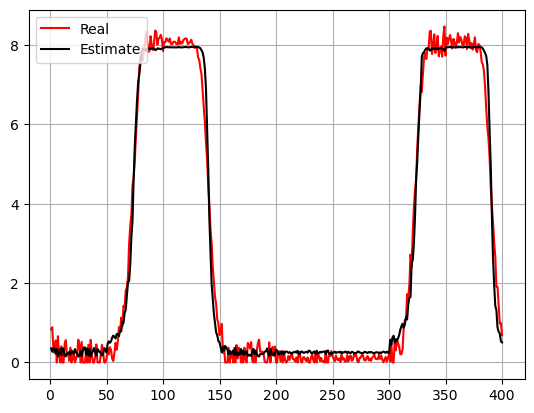

In [21]:
x=np.arange(1,valData+1)
plt.figure(2)
plt.plot(x,t1Test,'r-',label='Real')
plt.plot(x,yt,'k-',label='Estimate')
plt.legend(loc=2)
plt.grid()
plt.show()

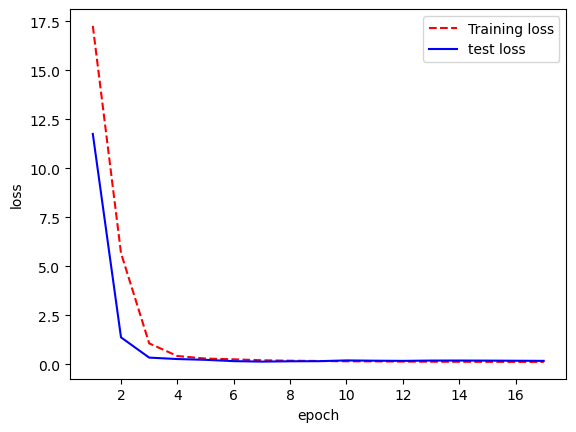

In [22]:
training_loss = trainModel.history['loss']
test_loss = trainModel.history['val_loss']
epoch_count = range(1,len(training_loss)+1)

plt.plot(epoch_count,trainModel.history['loss'],'r--')
plt.plot(epoch_count,trainModel.history['val_loss'],'b-')
plt.legend(['Training loss','test loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()